In [12]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('Water Quality Prediction.csv')
df = df.sample(n=100000, random_state=42)

In [14]:
df.dropna(inplace=True)

In [15]:
selected_features = df[['pH', 'Iron', 'Nitrate', 'Chloride', 'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity', 'Chlorine', 'Manganese', 'Total Dissolved Solids', 'Water Temperature', 'Air Temperature', 'Day']]
X = selected_features.to_numpy()

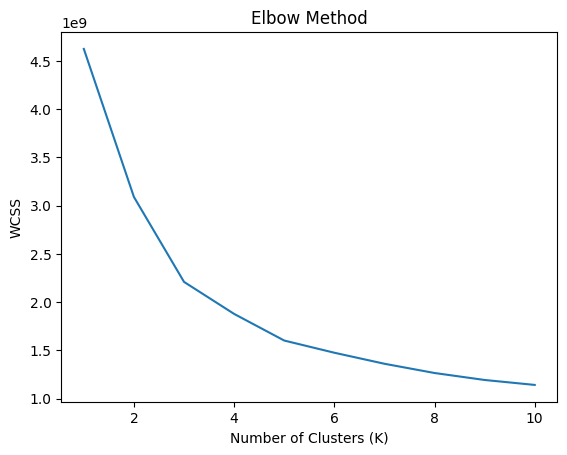

In [16]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [17]:
# Choose the optimal number of clusters (e.g., 3, 4, etc.) based on the Elbow Method
optimal_k = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_assignments = kmeans.fit_predict(X)

# Add the cluster assignments to your DataFrame
df['Cluster'] = cluster_assignments

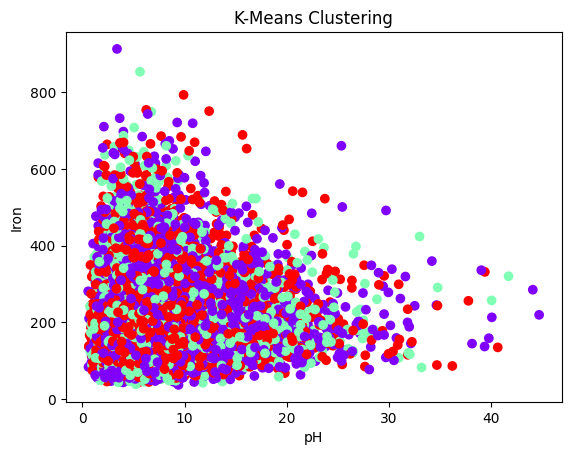

In [20]:
# Visualize the clusters (example for two features: pH and iron)
plt.scatter(X[:, 2], X[:, 3], c=cluster_assignments, cmap='rainbow')
plt.title('K-Means Clustering')
plt.xlabel('pH')
plt.ylabel('Iron')
plt.show()